**NAME: Anjali Rana**

**ROLL NO: 102017095**

**SUBGROUP: 3CS5**

**ASSIGNMENT-5**

**Q1**

In [26]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

Step 1: loading the dataset

In [32]:
iris=load_iris()
df=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Step 2: Preprocessing

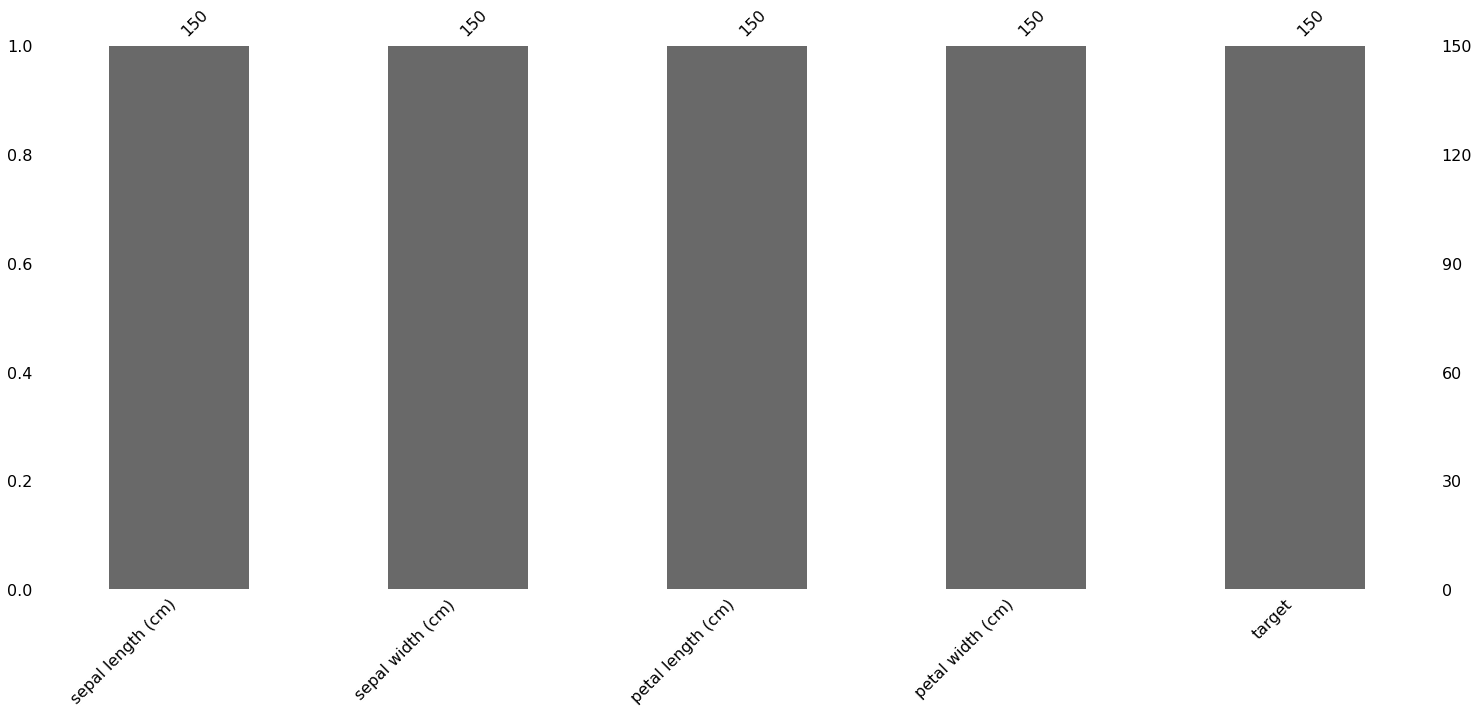

In [31]:
#checking for null values
import missingno as msn
msn.bar(df.iloc[:,:])

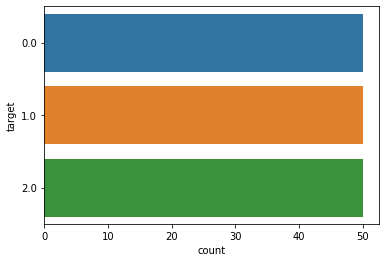

In [40]:
#Checking for class balancing
import seaborn as sns
sns.countplot(y=df.iloc[:,4],data=df)

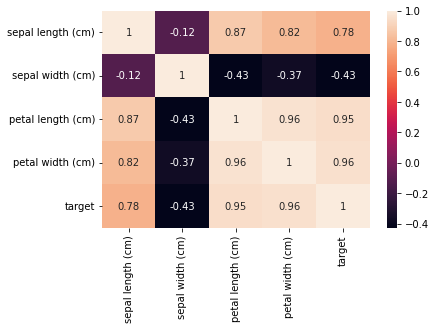

In [41]:
#Checking for correlation between imput features
sns.heatmap(df.iloc[:,:13].corr(),annot=True)

Step 3: Splitting Input and Output Features

In [45]:
X=df.iloc[:, 0:4]
y=df.iloc[:,4]

Step 4: Splitting dataset into training and testing sets

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=13)

Step 5: Train the model

In [48]:
lr=LogisticRegression(multi_class='ovr')
model=lr.fit(X_train, y_train)
#ovr: OneVsRest

Step 6: Predicting values from the model

In [49]:
y_predict = model.predict(X_test)
y_predict

array([1., 1., 0., 2., 2., 0., 2., 2., 0., 1., 2., 1., 1., 0., 2., 0., 2.,
       2., 1., 0., 1., 0., 0., 2., 1., 2., 0., 2., 1., 2., 2., 0., 0., 2.,
       2., 1., 0., 1., 1., 0., 0., 2., 1., 2., 2.])

Step 7: Evaluating model

In [50]:
print("Test set accuracy: ", accuracy_score(y_test, y_predict)*100, '%')

Test set accuracy:  97.77777777777777 %


In [51]:
print("Classification Report:")
print(classification_report(y_test, y_predict))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Q2**

Step 1(common): Loading the dataset

In [82]:
df1=pd.read_csv('/content/Asus/OneDrive/exam6.txt')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0.051267  117 non-null    float64
 1   0.69956   117 non-null    float64
 2   1         117 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


Step 2(common): Preprocessing

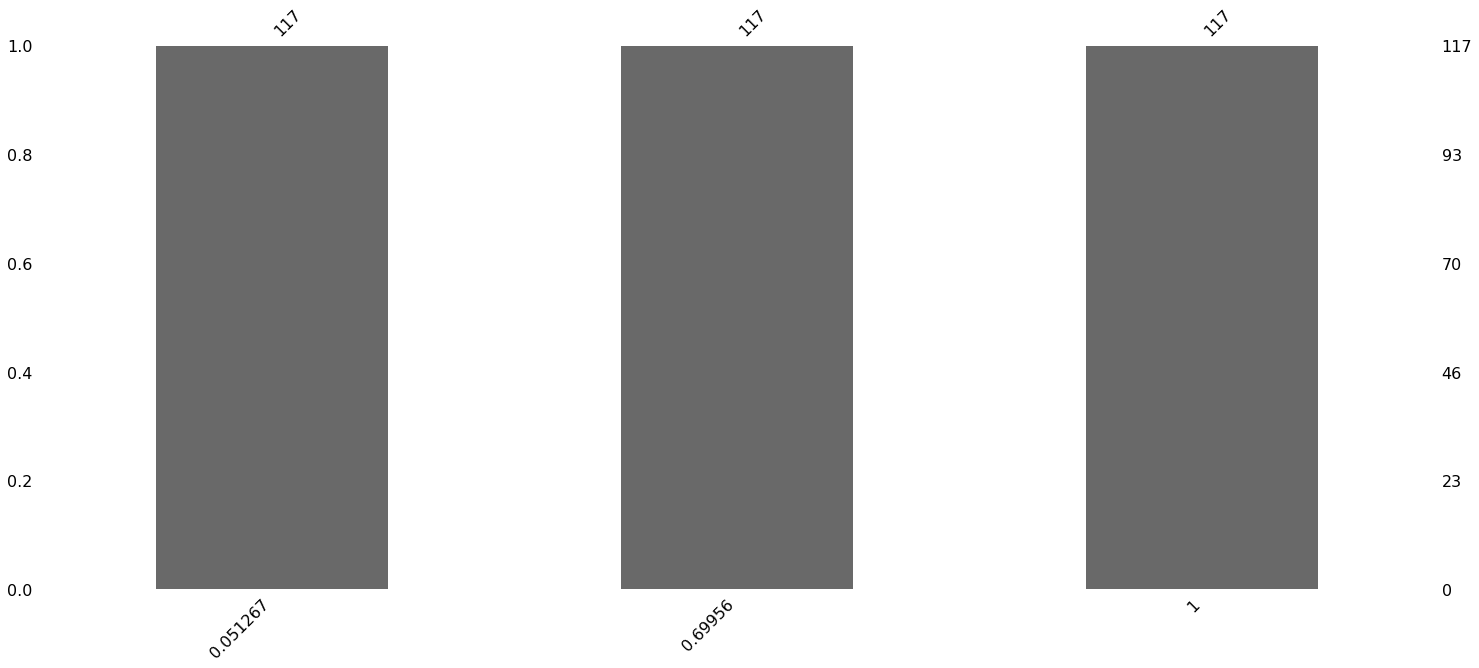

In [83]:
#Checking for NULL values:
msn.bar(df1.iloc[:,:])

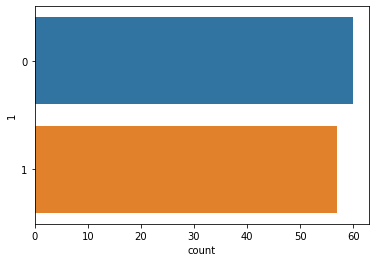

In [84]:
#Checking for class balancing:
sns.countplot(y=df1.iloc[:,2],data=df1)

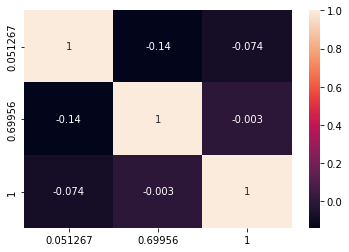

In [85]:
#Checking for correlation betwen input features:
sns.heatmap(df1.iloc[:,:].corr(),annot=True)

Step 3(common): Splitting Input and Output features

In [87]:
from sklearn.preprocessing import StandardScaler
X1=df1.iloc[:,0:2]
Y1=df1.iloc[:,2]
scaler=StandardScaler()
X1_scaled=scaler.fit_transform(X1)
X1_scaled=np.insert(X1_scaled,0,values=1,axis=1)

Step 4(common): Splitting data into train and test sets

In [93]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_scaled, Y1, test_size=0.2, random_state=13)

***part (i)***

Step 5: Optimal beta using gradient descent

In [94]:
n=1000 #number of iterations
alpha=10
m,k=X1_train.shape
B=np.zeros(k)
for i in range(n):
  cost_gradient=np.zeros(k)
  Z=X1_train.dot(B)
  predicted=1/(1+np.exp(-Z))
  diff=predicted-Y1_train
  for j in range(k):
    cost_gradient[j]=np.sum(diff.dot(X1_train[:,j]))
  for j in range(k):
    B[j]=B[j]-(alpha/m)*cost_gradient[j]
print(B)

[-0.46536673  0.79326117 -0.77795527]


Step 6: Predicting and Labelling

In [95]:
Y1_predict=1/(1+np.exp(-(X1_test.dot(B))))
Y1_label=np.zeros(len(Y1_predict))
for i in range(len(Y1_predict)):
  if(Y1_predict[i]>=0.5):
    Y1_label[i]=1

Step 7: Evaluating model

In [96]:
TP=0
TN=0
FP=0
FN=0
Y1_test=np.array(Y1_test).reshape(-1,1)
for i in range(len(Y1_label)):
  if(Y1_test[i]==1 and Y1_label[i]==1):
    TP=TP+1
  if(Y1_test[i]==1 and Y1_label[i]==0):
    FN=FN+1
  if(Y1_test[i]==0 and Y1_label[i]==1):
    FP=FP+1
  if(Y1_test[i]==0 and Y1_label[i]==0):
    TN=TN+1
print(TP,TN,FP,FN)

6 8 4 6


In [106]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy: ",accuracy)
#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("\nPrecision_pos: ",precision_pos,"\nRecall_pos: ",recall_pos,"\nF1score_pos: ",f1_score_pos)
#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("\nPrecision_neg: ",precision_neg,"\nRecall_neg: ",recall_neg,"\nF1score_neg: ",f1_score_neg)

Accuracy:  0.5833333333333334

Precision_pos:  0.6 
Recall_pos:  0.5 
F1score_pos:  0.5454545454545454

Precision_neg:  0.5714285714285714 
Recall_neg:  0.6666666666666666 
F1score_neg:  0.6153846153846153


In [101]:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print("\nMacro Precision: ",macro_precision,"\nMacro Recall: ",macro_recall,"\nMacro F1Score: ",macro_f1_score)


Macro Precision:  0.5857142857142856 
Macro Recall:  0.5833333333333333 
Macro F1Score:  0.5804195804195804


In [103]:
l1=len(Y1_test[Y1_test==0])
l2=len(Y1_test[Y1_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print("\nWeighted Precision: ",weighted_precision,"\nWeighted recall: ",weighted_recall,"\nWeighted F1Score: ",weighted_f1_score)


Weighted Precision:  0.5857142857142857 
Weighted recall:  0.5833333333333334 
Weighted F1Score:  0.5804195804195803


***part (ii)***

Step 5: Optimal beta matrix with ridge regularization

In [117]:
n=1000 #number of iterations
alpha=10
l=0.2
m,k=X1_train.shape
B1=np.zeros(k)
for i in range(n):
  cost_gradient=np.zeros(k)
  Z=X1_train.dot(B)
  predicted=1/(1+np.exp(-Z))
  diff=predicted-Y1_train
  for j in range(k):
    cost_gradient[j]=np.sum(diff.dot(X1_train[:,j]))
  for j in range(k):
    B1[j]=B[j]*(1-(alpha*l)/m)-(alpha/m)*cost_gradient[j]
    #due to added penalty factor
print(B1)

[ 0.32595948 -1.65752404  1.25246173]


Step 6: Predicting and Labelling

In [118]:
Y1_predict_ridge=1/(1+np.exp(-(X1_test.dot(B1))))
Y1_label_ridge=np.zeros(len(Y1_predict_ridge))
for i in range(len(Y1_predict_ridge)):
  if(Y1_predict_ridge[i]>=0.5):
    Y1_label_ridge[i]=1

Step 7:Evaluating Model

In [119]:
TP_ridge=0
TN_ridge=0
FP_ridge=0
FN_ridge=0
Y1_test=np.array(Y1_test).reshape(-1,1)
for i in range(len(Y1_label_ridge)):
  if(Y1_test[i]==1 and Y1_label_ridge[i]==1):
    TP_ridge=TP_ridge+1
  if(Y1_test[i]==1 and Y1_label_ridge[i]==0):
    FN_ridge=FN_ridge+1
  if(Y1_test[i]==0 and Y1_label_ridge[i]==1):
    FP_ridge=FP_ridge+1
  if(Y1_test[i]==0 and Y1_label_ridge[i]==0):
    TN_ridge=TN_ridge+1
print(TP_ridge,TN_ridge,FP_ridge,FN_ridge)

6 4 8 6


In [120]:
accuracy=(TP_ridge+TN_ridge)/(TP_ridge+TN_ridge+FP_ridge+FN_ridge)
print("Accuracy: ",accuracy)
#For positive class:
precision_pos=TP_ridge/(TP_ridge+FP_ridge)
recall_pos=TP_ridge/(TP_ridge+FN_ridge)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("\nPrecision_pos: ",precision_pos,"\nRecall_pos: ",recall_pos,"\nF1score_pos: ",f1_score_pos)
#For negative class
precision_neg=TN_ridge/(TN_ridge+FN_ridge)
recall_neg=TN_ridge/(TN_ridge+FP_ridge)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("\nPrecision_neg: ",precision_neg,"\nRecall_neg: ",recall_neg,"\nF1score_neg: ",f1_score_neg)

Accuracy:  0.4166666666666667

Precision_pos:  0.42857142857142855 
Recall_pos:  0.5 
F1score_pos:  0.4615384615384615

Precision_neg:  0.4 
Recall_neg:  0.3333333333333333 
F1score_neg:  0.3636363636363636


In [121]:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print("\nMacro Precision: ",macro_precision,"\nMacro Recall: ",macro_recall,"\nMacro F1Score: ",macro_f1_score)


Macro Precision:  0.41428571428571426 
Macro Recall:  0.41666666666666663 
Macro F1Score:  0.41258741258741255


In [122]:
l1=len(Y1_test[Y1_test==0])
l2=len(Y1_test[Y1_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print("\nWeighted Precision: ",weighted_precision,"\nWeighted recall: ",weighted_recall,"\nWeighted F1Score: ",weighted_f1_score)


Weighted Precision:  0.4142857142857143 
Weighted recall:  0.4166666666666667 
Weighted F1Score:  0.41258741258741255
